## Linear regression in TensorFlow with eager mode

A linear regression implemented using TensorFlow's Eager API
* Author: Gao Yang

#### Setup eager mode

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import tensorflow.contrib.eager as tfe
import matplotlib.pyplot as plt
import numpy as np

print("Enabling eager execution...")
tfe.enable_eager_execution()
print("Eager execution status: {}".format(tf.executing_eagerly()))

/Users/Yang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Enabling eager execution...
Eager execution status: True


#### Creating training dataset

In [2]:
# train_x = [3.3, 4.4, 5.5, 6.81, 6.93, 4.20, 9.93, 6.28, 7.49, 2.17,
#          7.04, 10.9]
# train_y = [1.7, 2.76, 2.09, 3.18, 1.70, 1.90, 3.38, 2.60, 2.53, 1.22,
#          2.82, 3.46]
# --- this is Aymeric Damien's dataset, and I am not satisfied with it----

# --- I will generate my own training dataset using numpy, as follows:
train_x = np.linspace(0, 20, 100)
true_w = 5
true_b = 10
train_y = true_w * train_x + true_b
train_y = train_y + np.random.randn(len(train_x)) * 20 # add Gauss noise

print("Training dataset is ready.")

Training dataset is ready.


#### Create model

In [3]:
num_samples = len(train_x)
learning_rate = 0.01
num_epoch = 2001

# Put W and b outside of model to prevent model function from initializing W and b in every epoch
# Initialize W and b
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

def model(inputs):
    
    # model: linear regression
    return inputs*W + b

def loss(model, inputs, labels):
    
    # loss : mean square error
    
    return tf.reduce_sum(tf.pow((model(inputs) - labels), 2)) / (2 * num_samples)

    # tf.reduce_sum : get sum
    # tf.pow(x,y)   : get x.^y

grad = tfe.implicit_gradients(loss)
    
# Stochastic Gradient Descent (SGD) optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)



#### Train the model


In [4]:
# initial loss

train_loss = []

print("Initial loss: {:.3f}".format(loss(model,train_x,train_y)),
     "W = {:.9f}".format(W.numpy()),
     "b = {:.9f}".format(b.numpy()))
      
for epoch in range(num_epoch):
    
    # ------ CORE code for linear regression --------- 
    optimizer.apply_gradients(grad(model,train_x,train_y))
    
    # store loss in a list for future visualization
    train_loss.append(loss(model, train_x, train_y))
    
    # output loss, W and b
    if epoch % 50 == 0:
        print("Epoch: {:04d}, W = {:.9f}, b = {:.9f}, loss = {:.3f}".format(epoch,
                                                                           W.numpy(),
                                                                           b.numpy(),
                                                                           loss(model, train_x, train_y)))

print('\n')
print("        True W = {:.9f}, b = {:.9f}".format(true_w, true_b))
    

Initial loss: 2977.470 W = -0.538967907 b = -0.799021125
Epoch: 0000, W = 8.065729141, b = -0.132027447, loss = 547.499
Epoch: 0050, W = 5.763480663, b = 0.806368530, loss = 211.224
Epoch: 0100, W = 5.690714836, b = 1.779647231, loss = 209.319
Epoch: 0150, W = 5.626584530, b = 2.637413263, loss = 207.839
Epoch: 0200, W = 5.570065975, b = 3.393373966, loss = 206.689
Epoch: 0250, W = 5.520255089, b = 4.059614658, loss = 205.797
Epoch: 0300, W = 5.476356506, b = 4.646782398, loss = 205.103
Epoch: 0350, W = 5.437667370, b = 5.164261818, loss = 204.565
Epoch: 0400, W = 5.403570652, b = 5.620325089, loss = 204.146
Epoch: 0450, W = 5.373520374, b = 6.022259712, loss = 203.821
Epoch: 0500, W = 5.347036839, b = 6.376492023, loss = 203.569
Epoch: 0550, W = 5.323695660, b = 6.688682079, loss = 203.373
Epoch: 0600, W = 5.303125381, b = 6.963820934, loss = 203.221
Epoch: 0650, W = 5.284996033, b = 7.206304073, loss = 203.102
Epoch: 0700, W = 5.269019127, b = 7.420008183, loss = 203.011
Epoch: 0750,

#### Draw dataset points and regression line

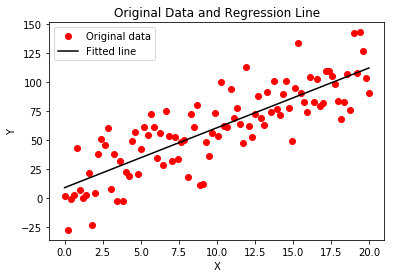

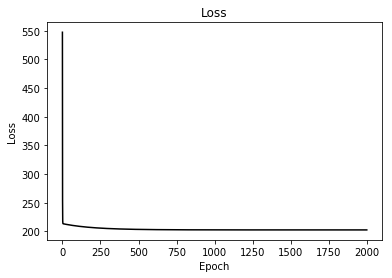

In [5]:
plt.plot(train_x, train_y, 'ro', label = 'Original data')
plt.plot(train_x, np.array(model(train_x)), 'k', label = 'Fitted line')
plt.title('Original Data and Regression Line')
plt.legend()
plt.xlabel('X'),plt.ylabel('Y')
plt.show()

plt.plot(train_loss,'k')
plt.title('Loss')
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()